# import

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

import warnings; warnings.simplefilter('ignore')

# read csv

In [2]:
weather_data = pd.read_csv('E:/UA/ECE 720/file/weatherstats_edmonton_hourly.csv')
mos_data = pd.read_csv('E:/UA/ECE 720/file/Mosquito_Trap_Data.csv')

In [3]:
mos_data.head()

,Trap Date,Genus,Specific Epithet,Gender,IDd,Count,Trap Region,Include,Comparison Group,Latitude,Longitude,Location
0,09/15/2015 12:00:00 AM,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,05/12/1998 12:00:00 AM,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,08/28/2001 12:00:00 AM,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,08/17/2004 12:00:00 AM,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,05/15/2018 12:00:00 AM,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [4]:
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


# change the date of mos data

In [5]:
t_list = []
for i in mos_data['Trap Date']:
    i = str(i)
    t1 = time.strptime(i,"%m/%d/%Y %H:%M:%S AM")
    t2 = time.strftime("%Y-%m-%d", t1)
    t_list.append(t2)

mos_data['Trap Date'] = t_list
#mos_data=mos_data.sort_values(by='Trap Date')
mos_data

,Trap Date,Genus,Specific Epithet,Gender,IDd,Count,Trap Region,Include,Comparison Group,Latitude,Longitude,Location
0,2015-09-15,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,1998-05-12,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,2001-08-28,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,2004-08-17,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,2018-05-15,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)
...,...,...,...,...,...,...,...,...,...,...,...,...
27258,1997-06-17,Aedes,spp.,Female,UnID,2,River Valley-GC1-East,NaN,Core,53.561514,-113.438112,POINT (-113.4381119 53.561514)
27259,2014-06-03,Male,UnID,Male,UnID,2,River Valley-West,NaN,Core,53.504068,-113.570126,POINT (-113.5701263 53.5040684)
27260,1995-07-18,Mansonia,perturbans,Female,NaN,2,River Valley-GC2-East,NaN,Core,53.553358,-113.462632,POINT (-113.462632 53.553358)
27261,2016-08-02,Culex,territans,Female,NaN,2,Rural-North West,NaN,Peripheral,53.619232,-113.712798,POINT (-113.7127984 53.6192317)


# date selection

In [6]:
mos_data['Trap Date'] = pd.to_datetime(mos_data['Trap Date'])
start_remove = min(weather_data['date_time_local'])
end_remove = max(weather_data['date_time_local'])
mos_data_1 = mos_data.loc[(mos_data["Trap Date"] > start_remove) & (mos_data["Trap Date"] < end_remove) ]
mos_date_start = str(mos_data_1['Trap Date'].dt.date.min())
mos_date_end = str(mos_data_1['Trap Date'].dt.date.max())
mos_date_range = mos_date_start +' to ' + mos_date_end
print("Range of dates in mosquito dataset is {}".format(mos_date_range))


mos_range = (mos_data['Trap Date'] > mos_date_start) & (mos_data['Trap Date'] < mos_date_end)
mos_data = mos_data.loc[mos_range]
print(mos_data) #
mos_data = mos_data.sort_values(by='Trap Date')
mos_data #final mos_data

Range of dates in mosquito dataset is 2017-05-09 to 2018-09-25
       Trap Date         Genus Specific Epithet  Gender   IDd  Count  \
4     2018-05-15      Culiseta        impatiens  Female   NaN      2   
6     2018-08-07         Aedes           vexans  Female   NaN     11   
14    2017-06-13         Aedes         dorsalis  Female   NaN      1   
17    2017-08-29         Aedes           vexans  Female   NaN     21   
18    2017-06-20      Culiseta         inornata  Female   NaN      5   
...          ...           ...              ...     ...   ...    ...   
27225 2017-06-27  Ochlerotatus           euedes  Female   NaN      2   
27229 2017-09-19      Culiseta         inornata  Female   NaN     12   
27236 2017-07-11  Ochlerotatus       excrucians  Female   NaN      2   
27241 2018-08-14      Culiseta         inornata  Female   NaN      5   
27247 2018-07-10          Misc             UnID  Female  UnID      1   

                      Trap Region Include Comparison Group   Latitude  \

,Trap Date,Genus,Specific Epithet,Gender,IDd,Count,Trap Region,Include,Comparison Group,Latitude,Longitude,Location
19195,2017-05-16,Ochlerotatus,Black legs,Female,UnID,13,Residential GC-South,NaN,Core,53.482057,-113.418346,POINT (-113.4183455 53.4820573)
6338,2017-05-16,Ochlerotatus,Black legs,Female,UnID,1,Outer Community-South1,NaN,Outer,53.333327,-113.531374,POINT (-113.5313737 53.3333269)
888,2017-05-16,Culiseta,alaskaensis,Female,NaN,1,Residential GC-South,NaN,Core,53.482057,-113.418346,POINT (-113.4183455 53.4820573)
26275,2017-05-16,Male,UnID,Male,UnID,1,River Valley-East-P1,NaN,Core,53.581417,-113.374561,POINT (-113.3745611 53.58141700000001)
18595,2017-05-16,Culiseta,inornata,Female,NaN,1,Rural-North West,NaN,Peripheral,53.619232,-113.712798,POINT (-113.7127984 53.6192317)
...,...,...,...,...,...,...,...,...,...,...,...,...
449,2018-09-18,Culiseta,inornata,Female,NaN,1,Rural-North West,NaN,Peripheral,53.619232,-113.712798,POINT (-113.7127984 53.6192317)
1584,2018-09-18,Culiseta,incidens,Female,NaN,1,River Valley-West,NaN,Core,53.504068,-113.570126,POINT (-113.5701263 53.5040684)
3493,2018-09-18,Male,UnID,Male,UnID,1,River Valley-West,NaN,Core,53.504068,-113.570126,POINT (-113.5701263 53.5040684)
24513,2018-09-18,Culiseta,inornata,Female,NaN,2,Residential GC-South,NaN,Core,53.482057,-113.418346,POINT (-113.4183455 53.4820573)


# calculate count

In [7]:
#sum count
#mos_data.groupby(mos_data['Trap Date'].dt.date).sum()
mos_count = mos_data.groupby(["Trap Date"]).agg({
    "Count":"sum",
})
mos_count[mos_count['Count'] == mos_count['Count'].max()]

mos_count ####number of mos

,Count
Trap Date,
2017-05-16,29
2017-05-23,523
2017-05-30,363
2017-06-06,1656
2017-06-13,2969
2017-06-20,1872
2017-06-27,769
2017-07-04,1779
2017-07-11,2253


- Attention: UDds of all male are 'UnID'

# weather features

In [8]:
start_date1 = '2017-05-10'#one week before 2017-05-16
end_date1 = '2017-09-26'
start_date2 = '2018-05-09'#one week before 2017-05-15
end_date2 = '2018-09-18'
#########needs improvement########

In [9]:
##############Drop MST and columns with too many NaNs###################
weather_data.drop(columns=["visibility", "cloud_cover_4", "cloud_cover_8", "cloud_cover_10", "solar_radiation", "wind_gust", "windchill", "humidex"], inplace=True)
weather_data = weather_data.loc[weather_data['date_time_local'].str.contains('MDT')]

weather_data

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
1072,2018-11-04 01:00:00 MDT,1541314800,92.14,100.1,S,19.0,7.0,91.0,0.2,1.5,2.1
1073,2018-11-04 00:00:00 MDT,1541311200,92.27,100.2,S,19.0,12.0,87.0,0.4,2.4,2.2
1074,2018-11-03 23:00:00 MDT,1541307600,92.42,100.4,WSW,24.0,4.0,86.0,0.3,2.5,2.4
1075,2018-11-03 22:00:00 MDT,1541304000,92.49,100.5,SE,14.0,12.0,83.0,0.1,2.8,2.6
1076,2018-11-03 21:00:00 MDT,1541300400,92.68,100.7,S,17.0,6.0,82.0,0.0,2.9,2.6
...,...,...,...,...,...,...,...,...,...,...,...
15514,2017-03-12 07:00:00 MDT,1489323600,94.71,103.2,E,9.0,9.0,85.0,-18.2,-16.3,NaN
15515,2017-03-12 06:00:00 MDT,1489320000,94.68,103.2,E,8.0,10.0,86.0,-18.3,-16.5,NaN
15516,2017-03-12 05:00:00 MDT,1489316400,94.61,103.1,ENE,8.0,9.0,86.0,-18.3,-16.4,NaN
15517,2017-03-12 04:00:00 MDT,1489312800,94.57,103.0,E,9.0,11.0,86.0,-18.3,-16.5,NaN


## select dates

In [10]:
t_list = []
for i in weather_data['date_time_local']:
    i = str(i)
    t1 = time.strptime(i,"%Y-%m-%d %H:%M:%S MDT")
    t2 = time.strftime("%Y-%m-%d", t1)
    t_list.append(t2)

weather_data['date_time_local'] = t_list
#print(weather_data)

weather_data['date_time_local'] = pd.to_datetime(weather_data['date_time_local'])
weather_range1 = (weather_data['date_time_local'] >= start_date1) & (weather_data['date_time_local'] <= end_date1)
weather_data1 = weather_data.loc[weather_range1]
weather_data1 = weather_data1.sort_values(by='date_time_local')
#print(weather_data1) 

weather_range2 = (weather_data['date_time_local'] >= start_date2) & (weather_data['date_time_local'] <= end_date2)
weather_data2 = weather_data.loc[weather_range2]
weather_data2 = weather_data2.sort_values(by='date_time_local')
#print(weather_data2) 
weather_data = weather_data1.append(weather_data2)
weather_data

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
14105,2017-05-10,1494396000,93.58,101.5,ESE,11.0,5.0,53.0,2.2,11.6,3.6
14082,2017-05-10,1494478800,93.54,101.4,ENE,7.0,6.0,58.0,4.4,12.6,3.3
14083,2017-05-10,1494475200,93.50,101.4,ENE,6.0,8.0,56.0,4.9,13.7,3.3
14084,2017-05-10,1494471600,93.47,101.3,NE,5.0,10.0,53.0,5.8,15.4,3.3
14085,2017-05-10,1494468000,93.43,101.3,ENE,6.0,11.0,46.0,5.4,17.2,3.2
...,...,...,...,...,...,...,...,...,...,...,...
2199,2018-09-18,1537257600,94.19,102.3,SW,21.0,4.0,92.0,0.9,2.0,1.3
2200,2018-09-18,1537254000,94.19,102.3,WSW,25.0,3.0,88.0,1.0,2.8,1.3
2201,2018-09-18,1537250400,94.21,102.3,WSW,24.0,5.0,82.0,0.8,3.6,1.2
2190,2018-09-18,1537290000,94.19,102.3,W,27.0,13.0,75.0,3.1,7.2,1.3


## confirm weather data can match mos data

In [14]:
print(len(mos_count)) #number of days
print(len(weather_data))

39
6552


In [15]:
number_of_days = len(weather_data)/(24*7)
number_of_days == len(mos_count)

True

# Linear Regression

- NOTE: subscripts A, B, C, D and E means that in each of the models you can/should utilize a subset(temperature, relative humudity, wind_speed .etc) of input variables.
- selection of A, B, C... needs more consideration

9


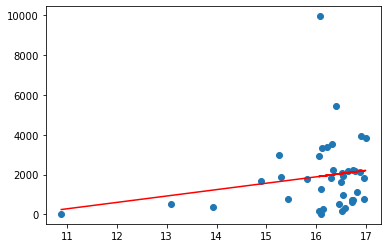

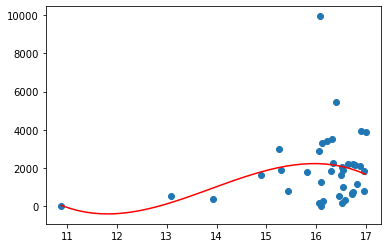

In [16]:
loc = weather_data.columns.get_loc("temperature")
print(loc)
temp = np.ones(int(len(weather_data)/(24*7)))
af = []
for i in range(int(len(weather_data)/(24*7))):
    af = weather_data.iloc[0:((i+1)*24*7), loc]#temp
    temp[i] = af.mean()


lreg = linear_model.LinearRegression()
train_x = temp.reshape(int(len(weather_data)/(24*7)),1)
train_y = mos_count
rangex_min = min(train_x)
rangex_max = max(train_x)

lreg.fit(train_x,train_y)
wsk = lreg.intercept_,lreg.coef_[0]
plt.scatter(train_x,train_y)
plt.plot(train_x,wsk[0]+wsk[1]*train_x,'r')
plt.show()

#########Polynomial Regression############
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(train_x)
sklreg_poly = linear_model.LinearRegression()
sklreg_poly.fit(X_train_poly,train_y)

X1 = np.linspace(rangex_min, rangex_max, len(mos_count)).reshape(len(mos_count), 1)
X1_poly = poly_features.fit_transform(X1)
Y_pred = sklreg_poly.predict(X1_poly)
plt.scatter(train_x,train_y)
plt.plot(X1,Y_pred,'r')
plt.show()

## Consider male and female

In [17]:
mos_data_male = mos_data.loc[mos_data['Gender'].str.contains('Male')]
mos_data_female = mos_data.loc[mos_data['Gender'].str.contains('Female')]

mos_count_male = mos_data_male.groupby(["Trap Date"]).agg({
    "Count":"sum",
})
mos_count_male[mos_count_male['Count'] == mos_count_male['Count'].max()]

print(mos_count_male) ####number of mos_male

mos_count_female = mos_data_female.groupby(["Trap Date"]).agg({
    "Count":"sum",
})
mos_count_female[mos_count_female['Count'] == mos_count_female['Count'].max()]

print(mos_count_female) ####number of mos_female

            Count
Trap Date        
2017-05-16      6
2017-05-23    325
2017-05-30    213
2017-06-06   1130
2017-06-13   1708
2017-06-20    977
2017-06-27    437
2017-07-04    705
2017-07-11    420
2017-07-18    323
2017-07-25    289
2017-08-01    174
2017-08-08    204
2017-08-15    879
2017-08-22   1792
2017-08-29   1448
2017-09-05    388
2017-09-12    951
2017-09-19     53
2017-09-26    106
2018-05-15     89
2018-05-22    797
2018-05-29   2306
2018-06-05   1943
2018-06-12   6637
2018-06-19   1950
2018-06-26   1671
2018-07-03    903
2018-07-10    959
2018-07-17    533
2018-07-24    427
2018-07-31    883
2018-08-07   1205
2018-08-14   1143
2018-08-21    662
2018-08-28    406
2018-09-04    232
2018-09-11    365
2018-09-18     20
            Count
Trap Date        
2017-05-16     23
2017-05-23    198
2017-05-30    150
2017-06-06    526
2017-06-13   1261
2017-06-20    895
2017-06-27    332
2017-07-04   1074
2017-07-11   1833
2017-07-18   1319
2017-07-25    692
2017-08-01    553
2017-08-08

7


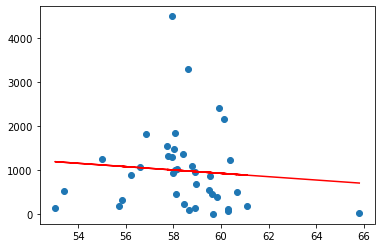

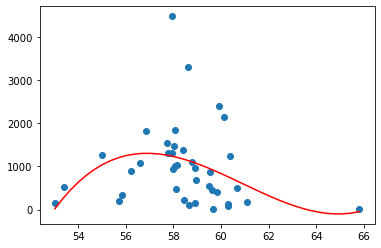

In [19]:
##########relative_humidity#############
loc = weather_data.columns.get_loc("relative_humidity")
print(loc)
rel_hum = np.ones(int(len(weather_data)/(24*7)))
af = []
for i in range(int(len(weather_data)/168)):
    af = weather_data.iloc[0:((i+1)*24*7), loc]#relative_humidity
    rel_hum[i] = af.mean()


##########relative_humidity#############
lreg = linear_model.LinearRegression()
train_x = rel_hum.reshape(int(len(weather_data)/(24*7)),1)
train_y = mos_count_female
rangex_min = min(train_x)
rangex_max = max(train_x)


lreg.fit(train_x,train_y)
wsk = lreg.intercept_,lreg.coef_[0]
plt.scatter(train_x,train_y)
plt.plot(train_x,wsk[0]+wsk[1]*train_x,'r')
plt.show()


poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(train_x)
sklreg_poly = linear_model.LinearRegression()
sklreg_poly.fit(X_train_poly,train_y)


X1 = np.linspace(rangex_min, rangex_max, len(mos_count_female)).reshape(len(mos_count_female), 1)
X1_poly = poly_features.fit_transform(X1)
Y_pred = sklreg_poly.predict(X1_poly)
plt.scatter(train_x,train_y)
plt.plot(X1,Y_pred,'r')
plt.show()